# Winear Regression 🍷
by Sebastian Frank

## Table of Contents

- [Introduction](#Introduction)
- [Descriptive Analytics Research Question Set](#Descriptive-Analytics-Research-Question-Set)
- [Inference Research Question Set](#Inference-Research-Question-Set)
- [Linear Regression Research Question Set](#Linear-Regression-Research-Question-Set)
- [Logistic Regression Research Question Set](#Logistic-Regression-Research-Question-Set)
- [Other Classifiers](#Other-Classifiers) 
- [Conclusion](#Conclusion)
- [Sources](#Sources)

## Introduction
- [Table of Contents](#Table-of-Contents)

Motivation: The subjectivity of wine preferences and ratings is a centuries old debate. In modern times, it has pitted the elite 'sommelier' wine experts, who undergo years of training and specialization, against the masses. Many highly publicized reports and videos have poked fun at and even discredited the role that certain factors, such as price, play in influencing the perceived quality of a wine. For example, a study recorded in the Journal of Wine Economics found that "Individuals who are unaware of the price do not derive more enjoyment from more expensive wine" (Goldstein et al). The busting of myths such as this one have inspired researchers to determine a more objective algorithm with which to classify wine as being of 'good' or 'bad' quality. The following dataset, collected from the UCI Machine Learning Repository, contains physical and chemical information on thousands of red wines, along with their perceived 'good' or 'bad' quality based on a 1-10 scoring system, where scores less than 5 imply 'bad' quality and those over 5 imply 'good' quality. The motivation for the following project is to attempt to refine models which can consistently rate wine quality without the subjectivity of a human taster. 

Research Questions:
1. What is the relationship between fixed acidity (influences sweet and bitter flavors in wine) and volatile acidity (high amounts leads to vinegary flavor in wine) in the red wines in this dataset, and how is that relationship impacted based on wine quality? 
2. Is there a difference between the mean pH of 'bad' quality red wines and the mean pH of 'good' quality red wines?
3. Is there a linear relationship between pH and chlorides, sulfates, volatile acidity, and fixed acidity in the sample and in the relevant population?
4. Is there a linear relationship between the log-odds of the success level of wine quality and fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol in the sample and in the relevant population? Which of these features should be selected to ensure a parsimonious model is utilized?

These are interesting questions for the purpose of finding relationships between physiochemical properties of wine (which are objective and quantitative) to classify wines in 'good' or 'bad' quality buckets. The answers to these questions could be used in the development of more advanced research, data gathering, and model construction to more accurately rate wine quality. 

Dataset:

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
winedf = pd.read_csv('wine.csv')

In [3]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [5]:
winedf.shape

(1599, 12)

## Descriptive Analytics Research Question Set
- [Table of Contents](#Table-of-Contents)

Research Question: What is the relationship between fixed acidity (influences sweet and bitter flavors in wine) and volatile acidity (high amounts leads to vinegary flavor in wine) in the red wines in this dataset, and how is that relationship impacted based on wine quality? 

In [6]:
acid_group = winedf[['quality', 'fixed acidity', 'volatile acidity']].groupby('quality').agg(['mean'])

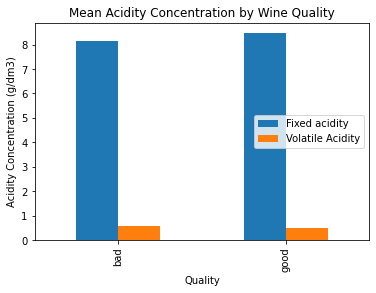

In [7]:
acid_group.plot.bar()
plt.xlabel('Quality')
plt.ylabel('Acidity Concentration (g/dm3)')
plt.legend(['Fixed acidity', 'Volatile Acidity'], loc = 'center right')
plt.title('Mean Acidity Concentration by Wine Quality')
plt.show()

In [8]:
acid_group

,fixed acidity,volatile acidity
,mean,mean
quality,,
bad,8.142204,0.589503
good,8.474035,0.474146


The visualization and summary statistics are useful in observing and confirming the relationship between different acid concentrations and the quality of the wine. We know that volatile acidity concentration affects the vinegary flavor and odor of wine, and that fixed acidity contributes bitter or sweet flavors in different combinations. We would expect that wine of 'bad' quality would contain higher concentrations of volatile acid, and lower concentrations of fixed acids as compared to their 'good' quality peers. This seems to hold true in the visualization and summary statistics, although the differences are miniscule. However, this would seem to indicate that ceterus parabus, even a small difference in acid concentrations between two bottles of wine could influence dramatically different wine qualities. 

## Inference Research Question Set
- [Table of Contents](#Table-of-Contents)

Research Question: Is there a difference between the mean pH of 'bad' quality red wines and the mean pH of 'good' quality red wines? 

${H_o}: \mu{_{bad}} - \mu{_{good}} = 0$

${H_a}: \mu{_{bad}} - \mu{_{good}} \neq{0}$

Conditions:
The sample data is random and independent. In addition, the quantity of red wines presented in the data is a small proportion of the total quantity of red wines in circulation, and the data also follows an approximately normal distribution. 

In [9]:
winedf[['pH', 'quality']].groupby('quality').agg(['mean', 'std'])

pH          
             mean       std
quality                    
bad      3.311653  0.154296
good     3.310643  0.154554

In [10]:
winedf.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [11]:
print('95% Confidence Interval:', '(', 
      3.311653 - 3.310643 - 1.962 * np.sqrt((0.154296 ** 2 / 744) + (0.154554 ** 2 / 855)), ',', 
      3.311653 - 3.310643 + 1.962 * np.sqrt((0.154296 ** 2 / 744) + (0.154554 ** 2 / 855)), ')', 
     )

95% Confidence Interval: ( -0.014179598185831947 , 0.016199598185832748 )


Based on the generated confidence interval, we are 95% confident that the true difference in population pH means for bad and good red wines lies between -0.014179598185831947 and 0.016199598185832748. If we were to generate 100 random samples and create confidence intervals for each of those samples, 95 of them would contain the true population value. Because the confidence interval includes 0, we fail to reject the null hypothesis that there is no discernible difference between pH levels for bad and good red wines. 

This conclusion answers our research question by demonstrating that there is no significant difference between pH levels for red wines rated as being of 'good' quality and those with 'bad' quality ratings. An important implication of this finding is that using pH levels as a feature variable, or 'regressor', may not be useful to classifying red wine as 'good' or 'bad'.  

## Linear Regression Research Question Set
- [Table of Contents](#Table-of-Contents)

Research Question: Is there a linear relationship between pH and fixed acidity, volatile acidity, citric acid, and chlorides in the sample and in the relevant population? 

In [12]:
winedf.rename(columns = {'residual sugar': 'residual_sugar', 'fixed acidity': 'fixed_acidity', 
                        'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 
                        'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':
                        'total_sulfur_dioxide'}, inplace = True)

In [13]:
linearmodel = smf.ols('pH ~ fixed_acidity + volatile_acidity + sulphates + chlorides', data = winedf).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     421.8
Date:                Mon, 02 May 2022   Prob (F-statistic):          5.08e-248
Time:                        16:27:04   Log-Likelihood:                 1296.3
No. Observations:                1599   AIC:                            -2583.
Df Residuals:                    1594   BIC:                            -2556.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7924      0.021    181.661      0.000       3.751       3.833
fixed_acidity       -0.0571      0.002    -35.299      0.000      -0.060      -0.054
volatile_acidity     0.0779      0.016      4.790      0.000       0.046       0.110
sulphates            0.0241      0.018      1.337      0.181      -0.011       0.060
chlorides           -0.7218      0.063    -11.493      0.000      -0.845      -0.599
==============================================================================
Omnibus:                       47.410   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.677
Skew:                          -0.028   Prob(JB):                     4.61e-26
Kurtosis:                       4.322   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{pH} = 3.7924 - 0.0571_{fixed acidity} + 0.0779_{volatile acidity} + 0.0241_{sulphates} - .7218_{chlorides}$

/Users/sebastianfrank/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


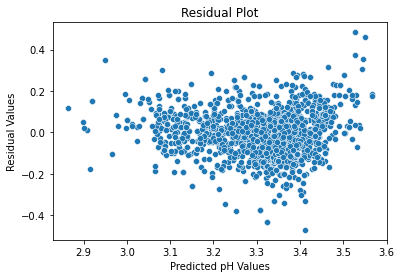

In [14]:
sns.scatterplot(linearmodel.fittedvalues, linearmodel.resid)
plt.title('Residual Plot')
plt.xlabel('Predicted pH Values')
plt.ylabel('Residual Values')
plt.show()

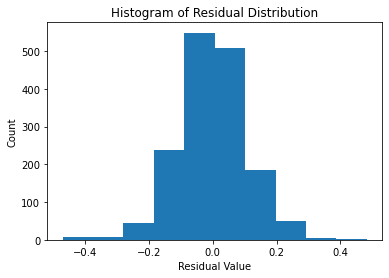

In [15]:
plt.hist(linearmodel.resid)
plt.title('Histogram of Residual Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.show()

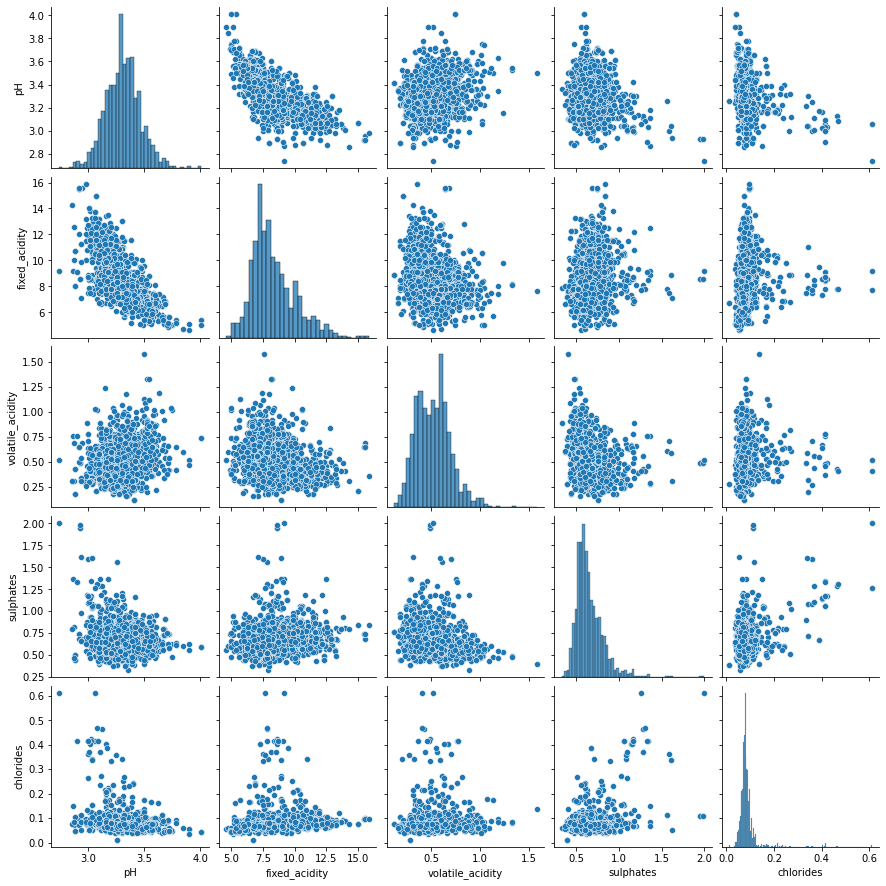

In [16]:
sns.pairplot(winedf[['pH', 'fixed_acidity', 'volatile_acidity', 'sulphates', 'chlorides']])
plt.show()

Only 51.4% of the variation in pH is explained by these four feature variables. This is a relatively low percentage. 

In [17]:
winedf[['pH', 'fixed_acidity', 'volatile_acidity', 'sulphates', 'chlorides']].corr()

,pH,fixed_acidity,volatile_acidity,sulphates,chlorides
pH,1.000000,-0.682978,0.234937,-0.196648,-0.265026
fixed_acidity,-0.682978,1.000000,-0.256131,0.183006,0.093705
volatile_acidity,0.234937,-0.256131,1.000000,-0.260987,0.061298
sulphates,-0.196648,0.183006,-0.260987,1.000000,0.371260
chlorides,-0.265026,0.093705,0.061298,0.371260,1.000000


Linear Regression Conditions: In this case, observations are independent, and the data appears to be linearly related. The feature data and residuals are distributed normally, and there do not appear to be serious quantities of outliers in the residual data. In addition, there is no serious multicollinerity present in the feature variables, nor is there evidence of heteroskedasticity in the residual plot. 

In [18]:
winedf.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [19]:
linearmodel.predict({'fixed_acidity': 7.4, 'volatile_acidity': .70, 'sulphates': 0.56, 'chlorides': .076})

0    3.382959
dtype: float64

In [20]:
residual = 3.51 - 3.382959
residual

0.12704099999999974

We have sufficient evidence that three of the four coefficients are statistically significant (i.e not equal to zero), because they have significant t-scores and p-values. On the other hand, the feature ``sulphates`` has a p-value above .05, signalling that it may insignificant in the population model.

The evidence collected through the linear regression analysis indicates that the relationship between pH and some of the variables linked to acidic content is relatively strong, but leaves the conclusion that more features may need to be taken into consideration to build a stronger model. 

## Logistic Regression Research Question Set
- [Table of Contents](#Table-of-Contents)

Research Question: Is there a linear relationship between the log-odds of the success level of wine quality and fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol in the sample and in the relevant population? Which of these features should be selected to ensure a parsimonious model is utilized? 

In [21]:
winedf['quality1'] = winedf['quality'].map({'good': 1, 'bad': 0})

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(winedf[['fixed_acidity', 'volatile_acidity', 'citric_acid', 
                                                           'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
                                                           'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']], winedf['quality1'], 
                                                   test_size = 0.2)
xtrainstd = pd.DataFrame(StandardScaler().fit(xtrain).transform(xtrain),
                           columns = xtrain.columns,
                           index = xtrain.index)

In [23]:
xtrain.shape

(1279, 11)

In [24]:
xtest.shape

(320, 11)

In [25]:
traindf = xtrain.join(ytrain)

In [26]:
traindf.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality1
524,9.2,0.430,0.49,2.4,0.086,23.0,116.0,0.99760,3.23,0.64,9.5,0
1122,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3,1
1531,6.1,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,3.60,0.66,10.2,0
1388,6.6,0.640,0.31,6.1,0.083,7.0,49.0,0.99718,3.35,0.68,10.3,0
1361,8.3,0.850,0.14,2.5,0.093,13.0,54.0,0.99724,3.36,0.54,10.1,0


In [27]:
logisticmodel = smf.logit('quality1 ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', 
                         data = traindf).fit()
logisticmodel.summary()

Optimization terminated successfully.
         Current function value: 0.506710
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               quality1   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1267
Method:                           MLE   Df Model:                           11
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2666
Time:                        16:27:09   Log-Likelihood:                -648.08
converged:                       True   LL-Null:                       -883.71
Covariance Type:            nonrobust   LLR p-value:                 4.295e-94
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               62.7093     90.661      0.692      0.489    -114.984     240.402
fixed_acidity            0.1327      0.112      1.180      0.238      -0.088       0.353
volatile_acidity        -3.6768      0.553     -6.654      0.000      -4.760      -2.594
citric_acid             -1.3189      0.628     -2.100      0.036      -2.550      -0.088
residual_sugar           0.0706      0.062      1.137      0.255      -0.051       0.192
chlorides               -3.8979      1.730     -2.253      0.024      -7.289      -0.507
free_sulfur_dioxide      0.0202      0.009      2.146      0.032       0.002       0.039
total_sulfur_dioxide    -0.0159      0.003     -4.918      0.000      -0.022      -0.010
density                -70.2556     92.618     -0.759      0.448    -251.783     111.271
pH                      -0.5522      0.824     -0.670      0.503      -2.168       1.064
sulphates                2.8606      0.516      5.543      0.000       1.849       3.872
alcohol                  0.8899      0.119      7.486      0.000       0.657       1.123
========================================================================================
"""

In [28]:
# drop density 
logisticmodel2 = smf.logit('quality1 ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + pH + sulphates + alcohol', 
                         data = traindf).fit()
logisticmodel2.summary()

Optimization terminated successfully.
         Current function value: 0.506935
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               quality1   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1268
Method:                           MLE   Df Model:                           10
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2663
Time:                        16:27:09   Log-Likelihood:                -648.37
converged:                       True   LL-Null:                       -883.71
Covariance Type:            nonrobust   LLR p-value:                 8.082e-95
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.0376      2.622     -2.303      0.021     -11.176      -0.899
fixed_acidity            0.0659      0.070      0.945      0.345      -0.071       0.203
volatile_acidity        -3.7377      0.549     -6.805      0.000      -4.814      -2.661
citric_acid             -1.3246      0.630     -2.103      0.035      -2.559      -0.090
residual_sugar           0.0430      0.050      0.855      0.393      -0.056       0.142
chlorides               -4.0138      1.727     -2.325      0.020      -7.398      -0.630
free_sulfur_dioxide      0.0208      0.009      2.222      0.026       0.002       0.039
total_sulfur_dioxide    -0.0161      0.003     -4.978      0.000      -0.022      -0.010
pH                      -0.9172      0.669     -1.372      0.170      -2.227       0.393
sulphates                2.7566      0.496      5.557      0.000       1.784       3.729
alcohol                  0.9533      0.085     11.223      0.000       0.787       1.120
========================================================================================
"""

In [29]:
# drop residual_sugar
logisticmodel3 = smf.logit('quality1 ~ fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + pH + sulphates + alcohol', 
                         data = traindf).fit()
logisticmodel3.summary()

Optimization terminated successfully.
         Current function value: 0.507219
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               quality1   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1269
Method:                           MLE   Df Model:                            9
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2659
Time:                        16:27:09   Log-Likelihood:                -648.73
converged:                       True   LL-Null:                       -883.71
Covariance Type:            nonrobust   LLR p-value:                 1.553e-95
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.0827      2.621     -2.320      0.020     -11.220      -0.945
fixed_acidity            0.0692      0.070      0.992      0.321      -0.067       0.206
volatile_acidity        -3.7016      0.546     -6.780      0.000      -4.772      -2.632
citric_acid             -1.2764      0.626     -2.037      0.042      -2.504      -0.048
chlorides               -3.9347      1.720     -2.288      0.022      -7.306      -0.564
free_sulfur_dioxide      0.0216      0.009      2.306      0.021       0.003       0.040
total_sulfur_dioxide    -0.0158      0.003     -4.903      0.000      -0.022      -0.009
pH                      -0.9116      0.669     -1.363      0.173      -2.222       0.399
sulphates                2.7242      0.495      5.505      0.000       1.754       3.694
alcohol                  0.9595      0.085     11.322      0.000       0.793       1.126
========================================================================================
"""

In [30]:
# drop pH
logisticmodel4 = smf.logit('quality1 ~ fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + sulphates + alcohol', 
                         data = traindf).fit()
logisticmodel4.summary()

Optimization terminated successfully.
         Current function value: 0.507946
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               quality1   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1270
Method:                           MLE   Df Model:                            8
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2648
Time:                        16:27:09   Log-Likelihood:                -649.66
converged:                       True   LL-Null:                       -883.71
Covariance Type:            nonrobust   LLR p-value:                 4.905e-96
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -9.3635      1.069     -8.755      0.000     -11.460      -7.267
fixed_acidity            0.1242      0.057      2.177      0.029       0.012       0.236
volatile_acidity        -3.8175      0.541     -7.060      0.000      -4.877      -2.758
citric_acid             -1.3122      0.625     -2.099      0.036      -2.538      -0.087
chlorides               -3.3360      1.658     -2.011      0.044      -6.587      -0.085
free_sulfur_dioxide      0.0200      0.009      2.139      0.032       0.002       0.038
total_sulfur_dioxide    -0.0148      0.003     -4.711      0.000      -0.021      -0.009
sulphates                2.6964      0.487      5.538      0.000       1.742       3.651
alcohol                  0.9424      0.084     11.274      0.000       0.779       1.106
========================================================================================
"""

In [31]:
print('Model 1 AIC:', logisticmodel.aic)
print('Model 2 AIC:', logisticmodel2.aic)
print('Model 3 AIC:', logisticmodel3.aic)
print('Model 4 AIC:', logisticmodel4.aic)
# AIC scores begin to diverge from BIC at model 4, we will use model 3 as our parsimonious model

Model 1 AIC: 1320.1632482647137
Model 2 AIC: 1318.739176499732
Model 3 AIC: 1317.4673966488745
Model 4 AIC: 1317.3261966156622


In [32]:
print('Model 1 BIC:', logisticmodel.bic)
print('Model 2 BIC:', logisticmodel2.bic)
print('Model 3 BIC:', logisticmodel3.bic)
print('Model 4 BIC:', logisticmodel4.bic)
# AIC scores begin to diverge from BIC at model 4, we will use model 3 as our parsimonious model

Model 1 BIC: 1382.0092538836598
Model 2 BIC: 1375.4313483170993
Model 3 BIC: 1369.005734664663
Model 4 BIC: 1363.7107008298717


In [33]:
logisticmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               quality1   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1269
Method:                           MLE   Df Model:                            9
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2659
Time:                        16:27:09   Log-Likelihood:                -648.73
converged:                       True   LL-Null:                       -883.71
Covariance Type:            nonrobust   LLR p-value:                 1.553e-95
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.0827      2.621     -2.320      0.020     -11.220      -0.945
fixed_acidity            0.0692      0.070      0.992      0.321      -0.067       0.206
volatile_acidity        -3.7016      0.546     -6.780      0.000      -4.772      -2.632
citric_acid             -1.2764      0.626     -2.037      0.042      -2.504      -0.048
chlorides               -3.9347      1.720     -2.288      0.022      -7.306      -0.564
free_sulfur_dioxide      0.0216      0.009      2.306      0.021       0.003       0.040
total_sulfur_dioxide    -0.0158      0.003     -4.903      0.000      -0.022      -0.009
pH                      -0.9116      0.669     -1.363      0.173      -2.222       0.399
sulphates                2.7242      0.495      5.505      0.000       1.754       3.694
alcohol                  0.9595      0.085     11.322      0.000       0.793       1.126
========================================================================================
"""

$log(\frac{\hat{p}}{1 - \hat{p}}) = -6.7176 + 0.1143_{fixed acidity} - 3.0247_{volatile acidity} - 1.2405_{citric acid} - 4.6473_{chlorides} + 0.0211_{free sulfur dioxide} - 0.0139_{total sulfur dioxide} - 0.9285_{pH} + 2.8869_{sulphates} + 0.9405_{alcohol}$

We have sufficient evidence that all  coefficients are statistically significant (i.e not equal to zero), except for ``fixed_acidity`` and ``pH``. These appear as statistically insignifcant due to their higher z scores and p-values above .05. For this reason, there is reason to believe that they may be equal to zero in the population model. 

In [34]:
testdf = xtest.join(ytest)

In [35]:
logisticmodeltest = smf.logit('quality1 ~ fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + pH + sulphates + alcohol', 
                         data = testdf).fit()
logisticmodeltest.summary()

Optimization terminated successfully.
         Current function value: 0.550700
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               quality1   No. Observations:                  320
Model:                          Logit   Df Residuals:                      310
Method:                           MLE   Df Model:                            9
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.2017
Time:                        16:27:09   Log-Likelihood:                -176.22
converged:                       True   LL-Null:                       -220.75
Covariance Type:            nonrobust   LLR p-value:                 2.523e-15
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -10.3599      5.116     -2.025      0.043     -20.388      -0.332
fixed_acidity            0.1676      0.135      1.240      0.215      -0.097       0.433
volatile_acidity        -1.6453      1.098     -1.498      0.134      -3.798       0.507
citric_acid             -1.0066      1.312     -0.767      0.443      -3.577       1.564
chlorides               -4.4796      3.871     -1.157      0.247     -12.066       3.107
free_sulfur_dioxide      0.0284      0.017      1.628      0.104      -0.006       0.063
total_sulfur_dioxide    -0.0181      0.006     -2.940      0.003      -0.030      -0.006
pH                       0.3547      1.320      0.269      0.788      -2.233       2.942
sulphates                2.6923      0.984      2.736      0.006       0.764       4.621
alcohol                  0.7852      0.156      5.027      0.000       0.479       1.091
========================================================================================
"""

In [36]:
def plot_roc(fpr, tpr, auc, lw = 2): 
   plt.plot(fpr, tpr, color = 'darkorange', lw = lw, 
            label = 'ROC curve (area = ' + str(round(auc, 3)) +')') 
   plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--') 
   plt.xlabel('False Positive Rate') 
   plt.ylabel('True Positive Rate') 
   plt.title('ROC Curve') 
   plt.legend(loc = "lower right") 
   plt.show()

In [37]:
fprs, tprs, thresholds = roc_curve(y_true = testdf['quality1'],  
                           y_score = logisticmodeltest.fittedvalues) 
auc = roc_auc_score(y_true = testdf['quality1'],  
                   y_score = logisticmodeltest.fittedvalues) 
print(auc)

0.7889583579096379


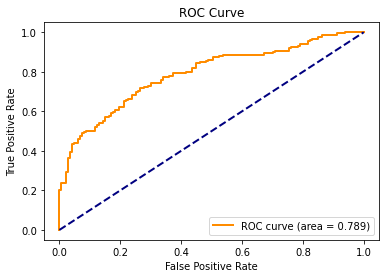

In [38]:
plot_roc(fprs, tprs, auc)

In [39]:
## Option 1 FPR (.5), TPR (.9) 
## Option 2 FPR (.1), TPR (.6)
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = yhat).ravel()
    tpr = tp / (fn + tp) 
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

In [40]:
newdf = testdf[['quality1', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'pH', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol']]
pred_probabilities = logisticmodeltest.predict(exog = dict(newdf))
testdf['predicted_prob'] = pred_probabilities
testdf.rename(columns = {'quality1': 'y'}, inplace = True)

In [41]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(testdf['y'], testdf['predicted_prob'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr       fpr
0       0.06  1.0  0.993197
   threshold  tpr       fpr
0       0.07  1.0  0.972789
   threshold  tpr       fpr
0       0.08  1.0  0.965986
   threshold  tpr       fpr
0       0.09  1.0  0.952381
   threshold  tpr       fpr
0        0.1  1.0  0.945578
   threshold  tpr       fpr
0       0.11  1.0  0.945578
   threshold      tpr       fpr
0       0.12  0.99422  0.918367
   threshold       tpr       fpr
0       0.13  0.988439  0.884354
   threshold       tpr       fpr
0       0.14  0.988439  0.863946
   threshold       tpr       fpr
0       0.15  0.976879  0.863946
   threshold       tpr      fpr
0       0.16  0.976879  0.85034
   threshold       tpr      fpr
0       0.17  0.971098  0.8503

In [42]:
## Option 1
testdf['yhat'] = (testdf['predicted_prob'] > .35) * 1

In [43]:
tn, fp, fn, tp = confusion_matrix(y_true = testdf['y'], y_pred = testdf['yhat']).ravel()
(tn, fp, fn, tp)

(65, 82, 20, 153)

In [44]:
confusion_matrix(y_true = testdf['y'], y_pred = testdf['yhat'])

array([[ 65,  82],
       [ 20, 153]])

In [45]:
false_positive = 68 / (68 * 2)
print('false positive rate:', false_positive)

false positive rate: 0.5


In [46]:
true_positive = 167 / (167 + 17)
print('true positive rate:', true_positive)

true positive rate: 0.907608695652174


In [47]:
# Option 2
testdf['yhat'] = (testdf['predicted_prob'] > .72) * 1

In [48]:
tn, fp, fn, tp = confusion_matrix(y_true = testdf['y'], y_pred = testdf['yhat']).ravel()
(tn, fp, fn, tp)

(136, 11, 88, 85)

In [49]:
confusion_matrix(y_true = testdf['y'], y_pred = testdf['yhat'])

array([[136,  11],
       [ 88,  85]])

In [50]:
false_positive = 16 / (16 + 120)
print('false positive rate:', false_positive)

false positive rate: 0.11764705882352941


In [51]:
true_positive = 109 / (109 + 75)
print('true positive rate:', true_positive)

true positive rate: 0.592391304347826


- Option 1 threshold : .35
- Option 2 threshold: .72

I selected the threshold at Option 2, because in this specific case, we would prefer to incorrectly classify wines of 
'good' quality as 'bad' by increasing the standards of the model, thereby minimizing the false positive rate, which represents 'bad' quality wines rated as 'good', misclassifications which harm the prestige of the model. 

There is a linear relationship between the log-odds of the success level of wine quality and a parsimonious model consisting of fixed acidity, volatile acidity, citric acid, pH, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol. This was demonstrated through the construction and application of the parsimonious logistic regression model to a test data set of physiochemical inputs. 

## Other Classifiers
- [Table of Contents](#Table-of-Contents)

In [52]:
winedf.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality1
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0


In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(winedf[['fixed_acidity', 'volatile_acidity', 'citric_acid', 
                                                           'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
                                                           'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']], winedf['quality1'], 
                                                   test_size = 0.2)
xtrainstd = pd.DataFrame(StandardScaler().fit(xtrain).transform(xtrain),
                           columns = xtrain.columns,
                           index = xtrain.index)

In [54]:
## KNN
leaf_size = list(range(1, 20))
n_neighbors = list(range(1, 20))
p = [1, 2]
hyperparams = {'leaf_size': leaf_size, 'n_neighbors': n_neighbors, 'p': p}

In [55]:
knnc = KNeighborsClassifier()

In [56]:
clf = GridSearchCV(knnc, hyperparams, cv = 5)

In [57]:
best_params = clf.fit(xtrainstd, ytrain)

In [58]:
print('Best leaf_size:', best_params.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_params.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_params.best_estimator_.get_params()['p'])

Best leaf_size: 1
Best n_neighbors: 13
Best p: 1


In [59]:
knnc = KNeighborsClassifier(n_neighbors = 1, leaf_size = 1, p = 1)

In [60]:
knnc.fit(xtrainstd, ytrain)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

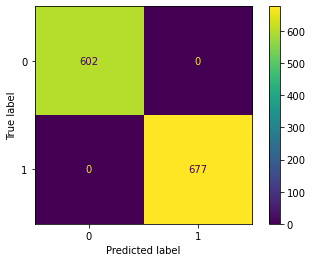

In [61]:
plot_confusion_matrix(knnc, xtrainstd, ytrain)

In [62]:
print(knnc.score(xtrainstd, ytrain))

1.0


In [63]:
xteststd = pd.DataFrame(StandardScaler().fit(xtest).transform(xtest),
                           columns = xtest.columns,
                           index = xtest.index)

In [64]:
knnc.fit(xteststd, ytest)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

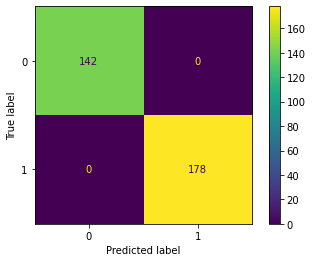

In [65]:
plot_confusion_matrix(knnc, xteststd, ytest)

In [66]:
print(knnc.score(xteststd, ytest))

1.0


## Conclusion
- [Table of Contents](#Table-of-Contents)

Summarization: In conclusion, there is a relationship between fixed and volatile acidities, which is influenced by the quality of wine. For example, fixed acidity levels are higher in good quality wine than in bad quality wine, while volatile acidity levels are higher in bad wines than in good ones. The inverse relationship of these two physiochemical variables contributes to the strength of bitter, sweet, and vinegary flavors in the wine. There is no difference between the mean pH of 'bad' quality red wines and the mean pH of 'good' quality red wines in this dataset. This inference test showed that pH may not serve as a useful feature in classifying wine quality, which was confirmed in backwards elimination testing during the logistic regression model component of the project. We discovered a linear relationship between pH and chlorides, sulfates, volatile acidity, and fixed acidity in the sample and in the relevant population through testing a linear model. Lastly, we observed a linear relationship between the log-odds of the success level of wine quality and a parsimonious model consisting of fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol. We chose to select a classification threshold that minimized the false positive rate and raised the bar of a 'good' wine. 

Future Work: Future research in this area could relate to the expansion of the data to more wine types, such as white or sparkling varieties. In addition, other features such as region, grape type, vintage, and brand could be useful factors to calibrating a model with stronger predictive power. 

## Sources
- [Table of Contents](#Table-of-Contents)

The dataset: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

Research materials: https://www.scitepress.org/Papers/2015/55519/55519.pdf, https://ageconsearch.umn.edu/record/37328?ln=en